In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns

#READ IN THE FILE

with open(r"C:\Users\HP\Documents\watch-history.html",  encoding='utf-8') as file:
    soup = BeautifulSoup(file, 'html.parser')

In [58]:
#EXTRACT ALL THE ACTIVITY RECORDS

watch_entries = soup.find_all('div', class_='content-cell mdl-cell mdl-cell--6-col mdl-typography--body-1')


In [11]:
#PREPARE THE DATA

data = []

for entry in watch_entries:
    link_tag = entry.find('a')
    
    # Try to get the timestamp as plain text
    try:
        timestamp = entry.find_all('br')[0].next_sibling
        watch_time = str(timestamp).strip() if timestamp else None
    except Exception as e:
        watch_time = None

    video_title = link_tag.text if link_tag else None
    video_url = link_tag['href'] if link_tag else None

    data.append({
        'Video Title': video_title,
        'Video URL': video_url,
        'Watch Time': watch_time
    })

df = pd.DataFrame(data)
df.head()


,Video Title,Video URL,Watch Time
0,10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORT...,https://www.youtube.com/watch?v=wObV_hwu2QM,"<a href=""https://www.youtube.com/channel/UCDyb..."
1,AI for Public Good: is Big Tech dominance the ...,https://www.youtube.com/watch?v=ttxX9izpStY,Watched at 6:15 PM
2,None,None,"Apr 13, 2025, 6:15:31 PM WAT"
3,Try inDrive for your ride,https://www.youtube.com/watch?v=rK5DvTqYoXI,Watched at 8:04 AM
4,6s Food 1920x1080,https://www.youtube.com/watch?v=NCkfzb1loPA,Watched at 8:04 AM


In [15]:
#CLEAN THE DATA
# CONVERTING WATCH TIME TO DATE TIME

df['Watch Time'] = pd.to_datetime(df['Watch Time'], errors='coerce')




In [17]:
#Extracting Channel Name from the video url

df['Channel Name'] = df['Video Title'].str.extract(r'on (.+)$')  # If structure fits
df['Clean Title'] = df['Video Title'].str.replace(r'Watched "(.+?)" on .+', r'\1', regex=True)
df['Clean Title'] = df['Clean Title'].fillna(df['Video Title'])


In [19]:
df[['Video Title', 'Clean Title']]


,Video Title,Clean Title
0,10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORT...,10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORT...
1,AI for Public Good: is Big Tech dominance the ...,AI for Public Good: is Big Tech dominance the ...
2,None,None
3,Try inDrive for your ride,Try inDrive for your ride
4,6s Food 1920x1080,6s Food 1920x1080
...,...,...
1496,Superhit - Full Ep - 7 - Zee TV,Superhit - Full Ep - 7 - Zee TV
1497,ZeeWorld: Bridal Material | May 2022 Teasers,ZeeWorld: Bridal Material | May 2022 Teasers
1498,A$AP Rocky - D.M.B. (Official Video),A$AP Rocky - D.M.B. (Official Video)
1499,Meera And Vivaan Share Some Romantic Time | Ka...,Meera And Vivaan Share Some Romantic Time | Ka...


In [56]:
#Extracting the Channel names from the Video Titles

df['Channel Name'] = df['Video Title'].str.extract(r'on (.+)$')


#Most Watched Channels

df.groupby('Channel Name').size().reset_index(name='Count').sort_values(['Count'],ascending = False).head(10)


,Channel Name,Count
55,Nursery Rhymes & Kids Songs,42
10,- Fri 4.30 PM & 9 PM | ZEE TV UK,7
70,Toliver) [Official Audio],6
109,| Project 1/4,6
51,Jumia!,6
75,delivery when you shop on Jumia!,4
96,the vehicle | Nursery Rhymes & Kids Songs - Ba...,4
78,in Python | Project 4/4,4
111,| Sing Along | Nursery Rhymes and Songs for Kids,3
105,| Moonbug Kids - Color Time,3


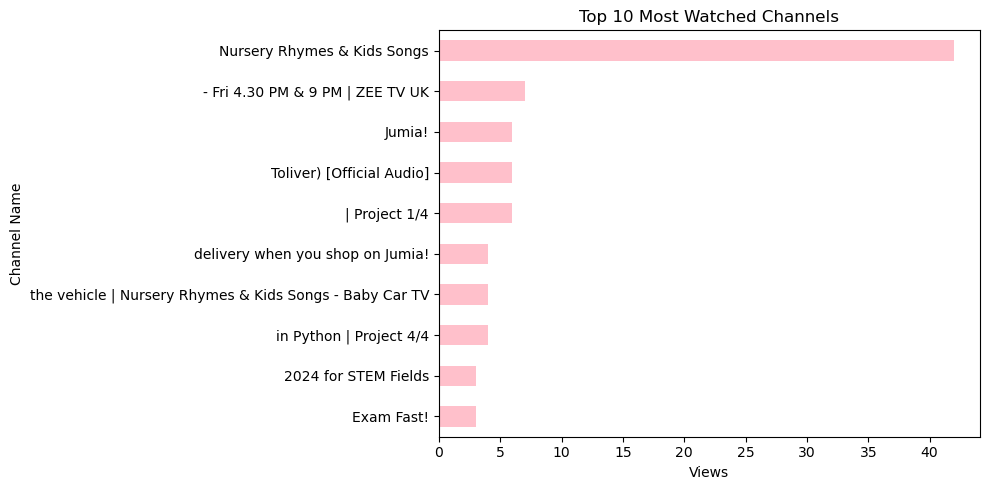

In [62]:
top_channels = df['Channel Name'].value_counts().head(10)

import matplotlib.pyplot as plt

top_channels.plot(kind='barh', title='Top 10 Most Watched Channels', figsize=(10,5), color='pink')
plt.xlabel("Views")
plt.ylabel("Channel Name")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()




In [67]:
#Most Watched Videos

df.groupby('Video Title').size().reset_index(name='Count').sort_values(['Count'],ascending = False).head(10)

,Video Title,Count
920,Wizkid - Everyday (Official Audio),15
922,Wizkid - Flower Pads (Official Audio),14
918,Wizkid - Deep (Official Audio),12
932,Wizkid - Slip N Slide (feat. Skillibeng & Shen...,12
931,Wizkid - Pressure (Official Audio),12
930,Wizkid - Plenty Loving (Official Audio),12
935,Wizkid - Wow (feat. Skepta & Naira Marley) [Of...,12
515,Loving You,10
116,Baby Shark | @CoComelon Nursery Rhymes & Kids ...,10
927,Wizkid - Money & Love (Official Audio),10


In [48]:
#Peak Viewing by YEAR


#Extracting the Year
df['Year'] = df['Watch Time'].dt.year


# Counting  videos per year
yearly_views = df.groupby('Year').size().reset_index(name='Count')


print("Videos watched per year:")
print(yearly_views)

Videos watched per year:
     Year  Count
0  2022.0     13
1  2023.0      8
2  2024.0     12
3  2025.0     61


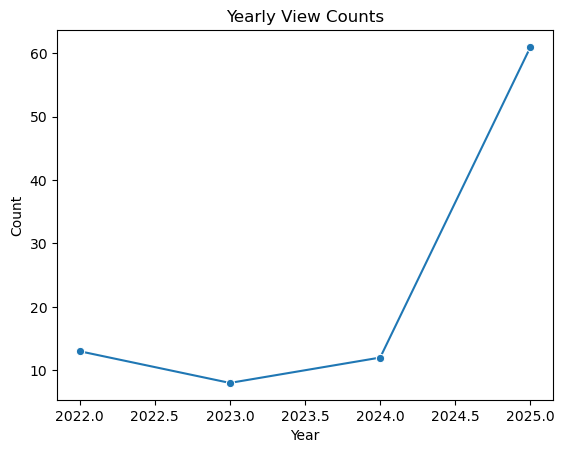

In [74]:
# line plot
sns.lineplot(data=yearly_views, x='Year', y='Count', marker='o')


# Add title and labels
plt.title('Yearly View Counts')
plt.xlabel('Year')
plt.ylabel('Count')


# Show the plot
plt.show()

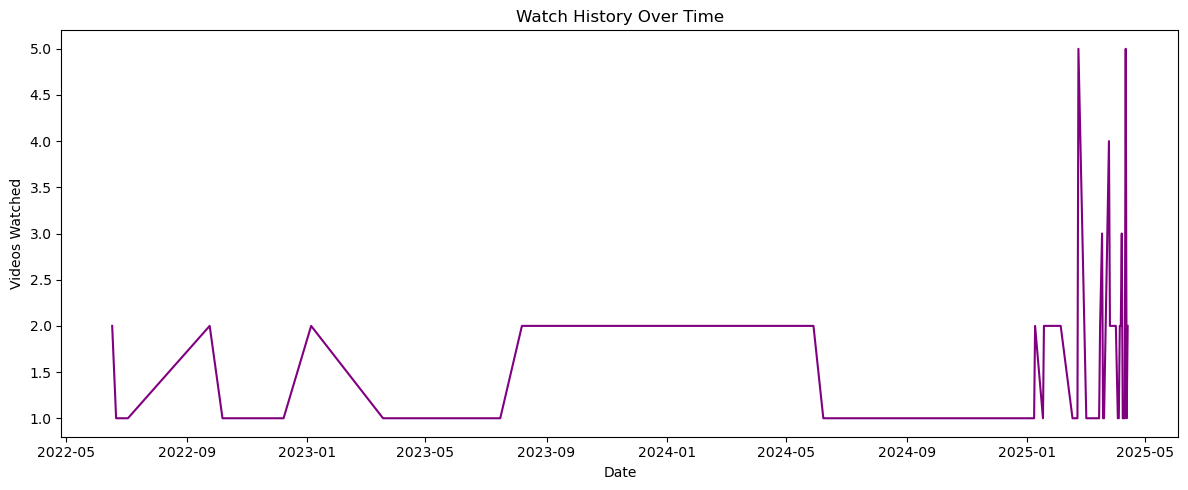

In [49]:
# Convert Watch Time to datetime 
df['Watch Time'] = pd.to_datetime(df['Watch Time'], errors='coerce')

# Extract the date part
df['Date'] = df['Watch Time'].dt.date


daily_views = df['Date'].value_counts().sort_index()
daily_views.plot(title='Watch History Over Time', figsize=(12, 5), color='purple')
plt.ylabel('Videos Watched')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

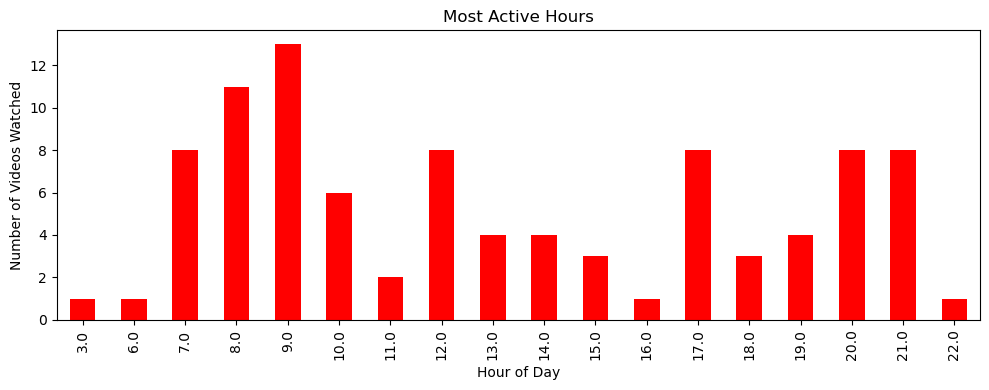

In [63]:
#Hourly & Daily Viewing Patterns
#Hourly
df['Hour'] = df['Watch Time'].dt.hour


df['Hour'].value_counts().sort_index().plot(kind='bar', title='Most Active Hours', figsize=(10,4), color='red')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Videos Watched")
plt.tight_layout()
plt.show()

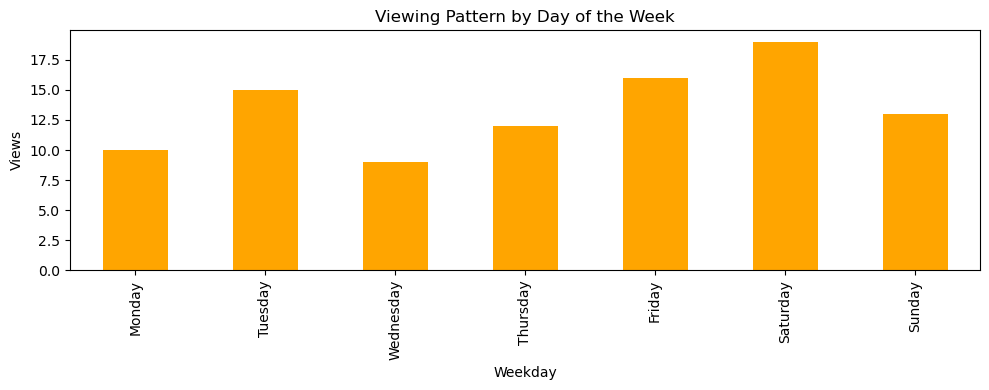

In [59]:
#Daily
df['Weekday'] = df['Watch Time'].dt.day_name()

df['Weekday'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).plot(kind='bar', title='Viewing Pattern by Day of the Week', figsize=(10,4), color='orange')
plt.ylabel("Views")
plt.tight_layout()
plt.show()


